# Data Viz with matplotlib Series 7: Area chart

## Reference
- Area chart
    <https://en.wikipedia.org/wiki/Area_chart>
- HOW TO DESIGN AREA CHARTS
    <https://visage.co/data-visualization-101-area-charts/>
- Stacked Area Graph
    <https://datavizcatalogue.com/methods/stacked_area_graph.html>
- 100% Stacked Area Chart
    <https://exceljet.net/chart-type/100-stacked-area-chart>

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Area chart

An area chart or area graph displays graphically quantitative data. It is based on the line chart. The area between axis and line are commonly emphasized with colors, textures and hatchings.

### When to use it ?

- Show or compare a quantitative progression over time.

### Example 1

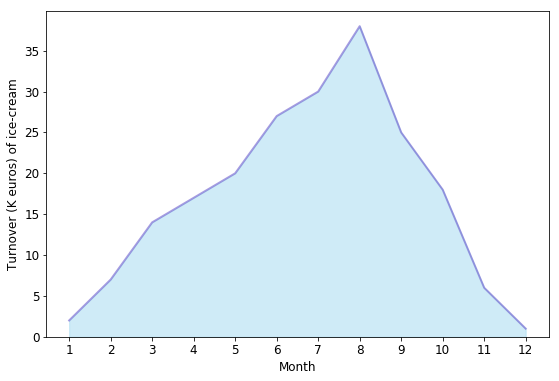

In [2]:
plt.figure(figsize=(9, 6))

turnover = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]
plt.fill_between(np.arange(12), turnover, color="skyblue", alpha=0.4)
plt.plot(np.arange(12), turnover, color="Slateblue", alpha=0.6, linewidth=2)

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)

plt.show()

Suppose that the plot above describes the turnover(k euros) of ice-cream's sales during one year. According to the plot, we can clearly find that the sales reach a peak in summer, then fall from autumn to winter, which is logical.

### Example 2

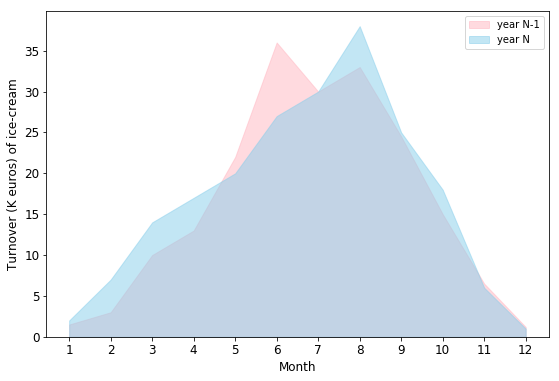

In [3]:
plt.figure(figsize=(9, 6))

year_n_1 = [1.5, 3, 10, 13, 22, 36, 30, 33, 24.5, 15, 6.5, 1.2]
year_n = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]

plt.fill_between(np.arange(12), year_n_1, color="lightpink", alpha=0.5, label='year N-1')
plt.fill_between(np.arange(12), year_n, color="skyblue", alpha=0.5, label='year N')

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)
plt.legend()

plt.show()

As an extension of the first plot, the second one compares two-year turnover together. The peak for both year is in the summer, for year N, the peak is in August; however, the peak is reached in June in the year N-1, which is caused by the heatwave in June.

## Stacked area chart

Stacked Area Graphs work in the same way as simple Area Graphs do, except for the use of multiple data series that start each point from the point left by the previous data series.

### When to use it ?

- Represent cumulated totals using numbers or percentages over time.
- Visualize part-to-whole relationships, helping show how each category contributes to the cumulative total.

### Example

In [4]:
bank_account_df = pd.DataFrame({'basic':[3000, 1300, 2300, 1700, 1000, 2300, 1600],
                                'saving':[10000, 10500, 11000, 11500, 12000, 12500, 13000],
                                'money_mkt':[500, 700, 1200, 1700, 2000, 1200, 1700],
                                'credit':[1000, 2000, 1000, 1000, 2000, 1000, 1000]},
                               columns=['basic', 'saving', 'money_mkt', 'credit'],
                               index=[datetime.date(2018, 5, 1), datetime.date(2018, 6, 1),
                                      datetime.date(2018, 7, 1), datetime.date(2018, 8, 1),
                                      datetime.date(2018, 9, 1), datetime.date(2018, 10, 1),
                                      datetime.date(2018, 11, 1)])
bank_account_df.index = pd.to_datetime(bank_account_df.index, format='%Y-%m-%d')
bank_account_df

,basic,saving,money_mkt,credit
2018-05-01,3000,10000,500,1000
2018-06-01,1300,10500,700,2000
2018-07-01,2300,11000,1200,1000
2018-08-01,1700,11500,1700,1000
2018-09-01,1000,12000,2000,2000
2018-10-01,2300,12500,1200,1000
2018-11-01,1600,13000,1700,1000


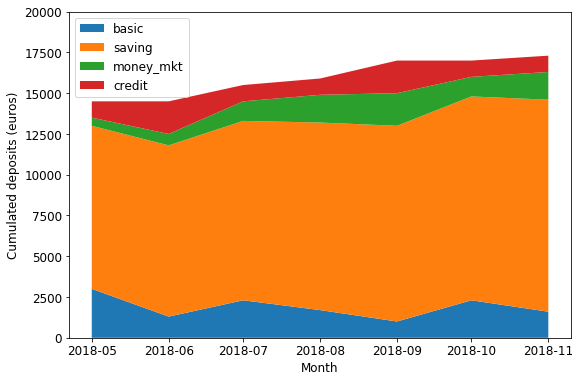

In [5]:
plt.figure(figsize=(9, 6))

plt.stackplot(bank_account_df.index,
              [bank_account_df['basic'], bank_account_df['saving'],
               bank_account_df['money_mkt'], bank_account_df['credit']],
              labels=['basic', 'saving', 'money_mkt', 'credit'])

plt.tick_params(labelsize=12)
plt.xlabel('Month', size=12)
plt.ylabel('Cumulated deposits (euros)', size=12)
plt.ylim(bottom=0, top=20000)
plt.legend(loc=2, fontsize='large')

plt.show()

This stacked area chart displays the amounts' changes in each account, their contribution to total amount (in term of value) as well.

## 100% Stacked Area Chart

Data plotted as areas and stacked so that the cumulative area always represents 100%.

### When to use it ?

This is best used to show distribution of categories as parts of a whole, where the cumulative total is unimportant.

### Example

In [6]:
data_perc = bank_account_df.divide(bank_account_df.sum(axis=1), axis=0)
data_perc

,basic,saving,money_mkt,credit
2018-05-01,0.206897,0.689655,0.034483,0.068966
2018-06-01,0.089655,0.724138,0.048276,0.137931
2018-07-01,0.148387,0.709677,0.077419,0.064516
2018-08-01,0.106918,0.723270,0.106918,0.062893
2018-09-01,0.058824,0.705882,0.117647,0.117647
2018-10-01,0.135294,0.735294,0.070588,0.058824
2018-11-01,0.092486,0.751445,0.098266,0.057803


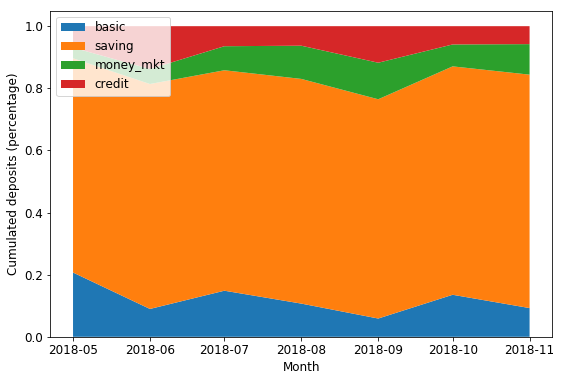

In [7]:
plt.figure(figsize=(9, 6))

plt.stackplot(data_perc.index,
              [data_perc['basic'], data_perc['saving'],
               data_perc['money_mkt'], data_perc['credit']],
              labels=['basic', 'saving', 'money_mkt', 'credit'])
plt.tick_params(labelsize=12)
plt.xlabel('Month', size=12)
plt.ylabel('Cumulated deposits (percentage)', size=12)
plt.ylim(bottom=0)
plt.legend(loc=2, fontsize='large')

plt.show()

This stacked area chart displays the amounts' changes in each account, their contribution to total amount (in term of percentage) as well.